In [10]:
import pandas as pd
df = pd.read_csv("Telco-Customer-Churn.csv")
print(df.head())  # প্রথম ৫ টা রেকর্ড দেখো


   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [11]:
print(df.info())  # ডেটার ধরন ও নাল ভ্যালু দেখাবে
print(df.isnull().sum())  # প্রতিটি কলামে মিসিং ডেটা কত আছে


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [12]:
# TotalCharges কে numeric এ রূপান্তর
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# যদি NaN আসে, তবে median দিয়ে পূরণ করো
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

# customerID drop করো, কারণ prediction এ দরকার নেই
df.drop('customerID', axis=1, inplace=True)

# ডুপ্লিকেট চেক করো, থাকলে ড্রপ করো
df.drop_duplicates(inplace=True)

# ফাইনাল ডেটা টাইপ এবং মিসিং চেক
print(df.dtypes)
print(df.isnull().sum())


gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn   

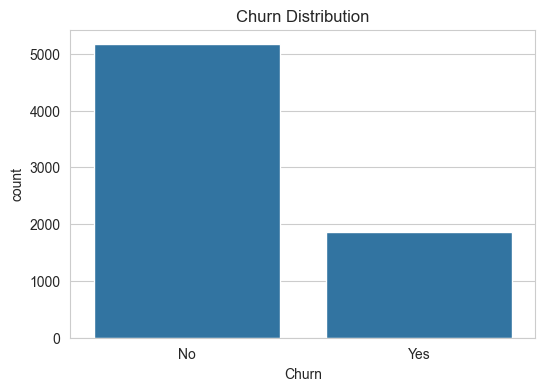

Churn Percentage:
 Churn
No     73.550776
Yes    26.449224
Name: proportion, dtype: float64


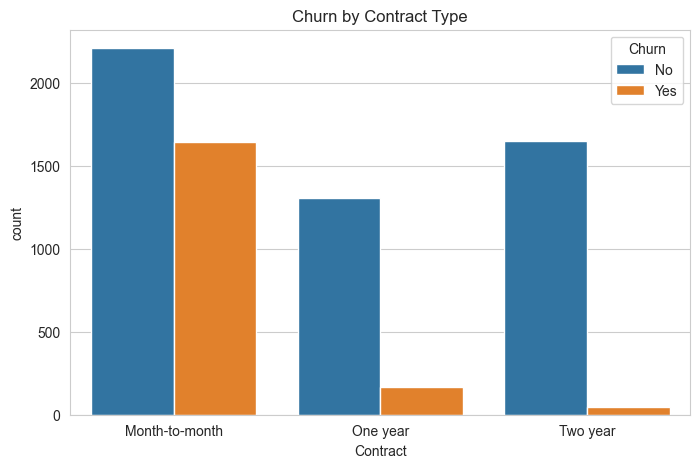

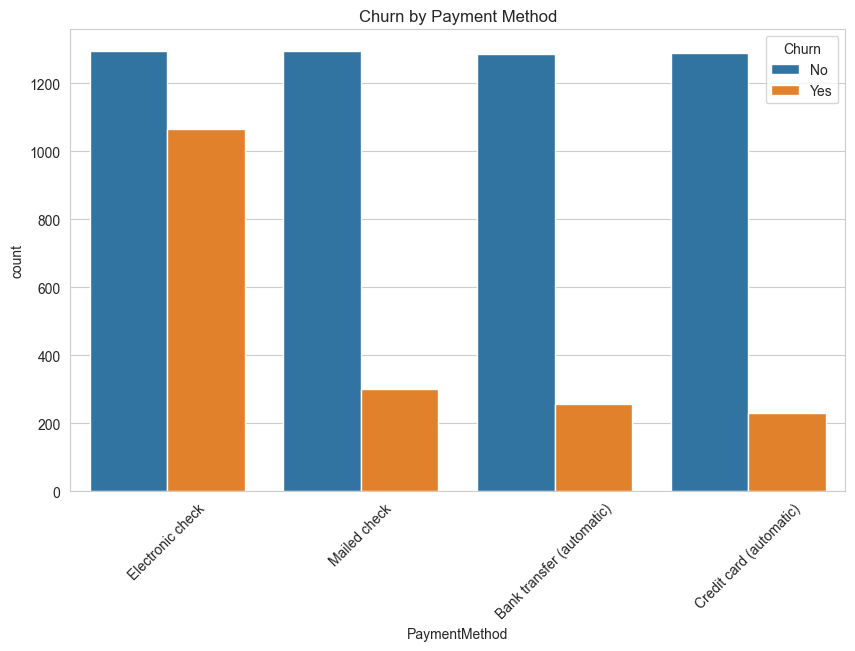

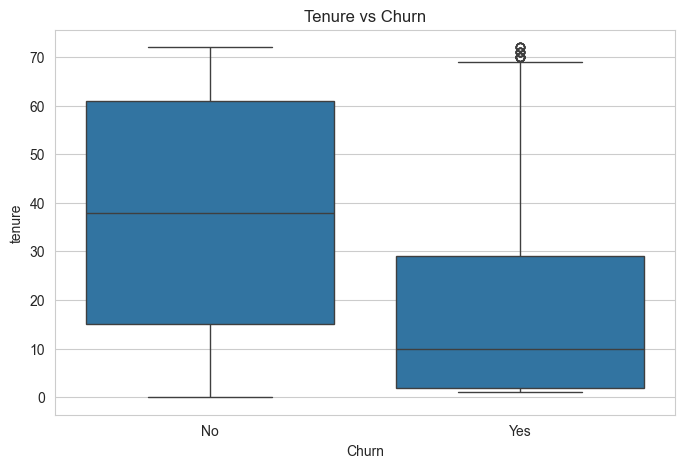

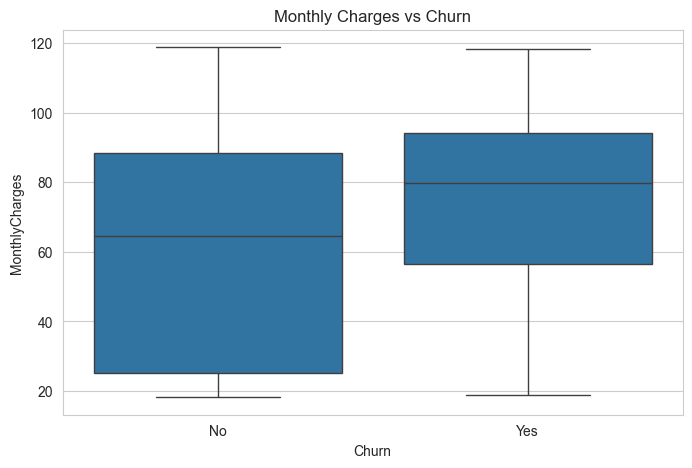

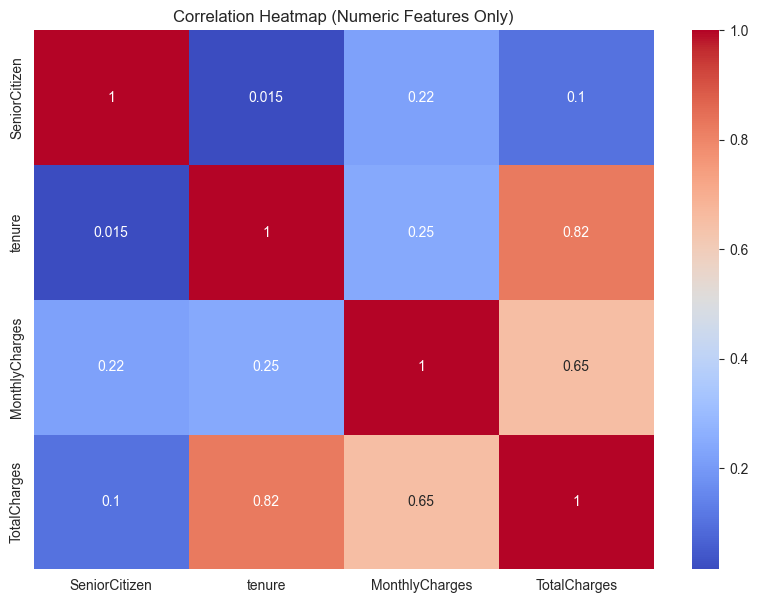

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

# 1. Churn distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()

# 2. Churn percentage
print("Churn Percentage:\n", df['Churn'].value_counts(normalize=True) * 100)

# 3. Churn by Contract type (categorical feature)
plt.figure(figsize=(8,5))
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Churn by Contract Type')
plt.show()

# 4. Churn by Payment Method
plt.figure(figsize=(10,6))
sns.countplot(x='PaymentMethod', hue='Churn', data=df)
plt.title('Churn by Payment Method')
plt.xticks(rotation=45)
plt.show()

# 5. Churn vs Tenure (numerical feature)
plt.figure(figsize=(8,5))
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Tenure vs Churn')
plt.show()

# 6. Churn vs Monthly Charges
plt.figure(figsize=(8,5))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges vs Churn')
plt.show()

# 7. Correlation heatmap for numerical features

plt.figure(figsize=(10,7))
sns.heatmap(df.select_dtypes(include=['int64', 'float64']).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (Numeric Features Only)')
plt.show()


In [20]:
from sklearn.preprocessing import LabelEncoder

binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

le = LabelEncoder()
for col in binary_cols:
    df[col] = le.fit_transform(df[col])

# Skip get_dummies — columns are already encoded
# df = pd.get_dummies(...)  <-- remove this

# Then continue with your model training pipeline...


In [21]:
from sklearn.model_selection import train_test_split

X = df.drop('Churn', axis=1)   # Features
y = df['Churn']                # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [23]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=5000, solver='lbfgs')
model.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=5000)

In [24]:
y_pred = model.predict(X_test_scaled)

from sklearn.metrics import accuracy_score, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.79288256227758
              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1053
           1       0.60      0.54      0.57       352

    accuracy                           0.79      1405
   macro avg       0.72      0.71      0.72      1405
weighted avg       0.79      0.79      0.79      1405



Accuracy: 0.7302491103202847
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      1053
           1       0.46      0.49      0.48       352

    accuracy                           0.73      1405
   macro avg       0.65      0.65      0.65      1405
weighted avg       0.74      0.73      0.73      1405



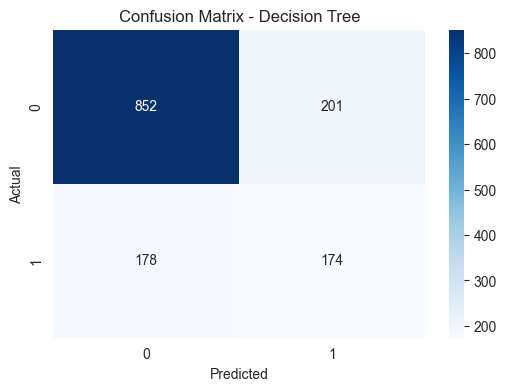

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Decision Tree মডেল তৈরি ও ট্রেনিং
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Step 2: প্রেডিকশন
y_pred = dt_model.predict(X_test)

# Step 3: Accuracy দেখানো
print("Accuracy:", accuracy_score(y_test, y_pred))

# Step 4: Detailed classification report
print(classification_report(y_test, y_pred))

# Step 5: Confusion matrix প্লট করা
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree')
plt.show()


Accuracy: 0.7935943060498221
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1053
           1       0.61      0.48      0.54       352

    accuracy                           0.79      1405
   macro avg       0.73      0.69      0.70      1405
weighted avg       0.78      0.79      0.78      1405



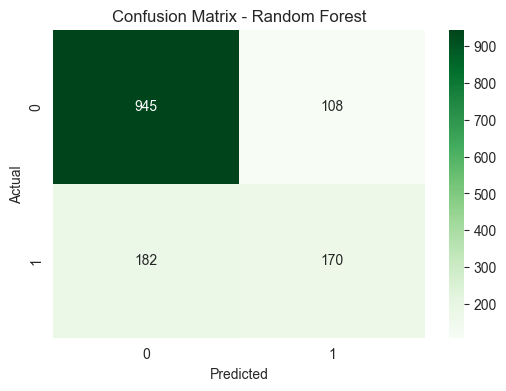

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. মডেল তৈরি (class_weight balanced দিয়ে imbalance হ্যান্ডেল করা)
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced', n_estimators=100)

# 2. মডেল ট্রেনিং
rf_model.fit(X_train, y_train)

# 3. প্রেডিকশন
y_pred = rf_model.predict(X_test)

# 4. Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# 5. Detailed classification report
print(classification_report(y_test, y_pred))

# 6. Confusion matrix প্লট
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()


In [27]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_resampled.value_counts())


Before SMOTE: Churn
0    4111
1    1505
Name: count, dtype: int64
After SMOTE: Churn
1    4111
0    4111
Name: count, dtype: int64


In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train_resampled, y_train_resampled)

y_pred = rf_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.7637010676156584
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1053
           1       0.53      0.59      0.56       352

    accuracy                           0.76      1405
   macro avg       0.69      0.71      0.70      1405
weighted avg       0.77      0.76      0.77      1405



In [29]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=3,
    n_jobs=-1,
    verbose=2,
    scoring='f1'
)

grid_search.fit(X_train_resampled, y_train_resampled)

print("Best parameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_

y_pred_best = best_model.predict(X_test)

print("Accuracy (best model):", accuracy_score(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))


Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy (best model): 0.7629893238434163
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1053
           1       0.52      0.59      0.56       352

    accuracy                           0.76      1405
   macro avg       0.69      0.71      0.70      1405
weighted avg       0.77      0.76      0.77      1405



In [32]:
# নতুন ফিচার তৈরি
df['AvgCharges'] = df['TotalCharges'] / (df['tenure'] + 1)  # tenure শূন্য হলে division error এড়াতে +1

# এরপর আবার train test split ও SMOTE প্রয়োগ করো, মডেল ট্রেন করো


In [33]:
!pip install xgboost
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

xgb_model = xgb.XGBClassifier(eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_resampled, y_train_resampled)

y_pred_xgb = xgb_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))



Accuracy: 0.7594306049822064
              precision    recall  f1-score   support

           0       0.85      0.82      0.84      1053
           1       0.52      0.57      0.54       352

    accuracy                           0.76      1405
   macro avg       0.68      0.69      0.69      1405
weighted avg       0.77      0.76      0.76      1405



In [34]:
y_pred_prob = best_model.predict_proba(X_test)[:, 1]  # churn এর probability

threshold = 0.3  # default 0.5 থেকে কমিয়ে দাও

y_pred_threshold = (y_pred_prob >= threshold).astype(int)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_threshold))


              precision    recall  f1-score   support

           0       0.92      0.67      0.77      1053
           1       0.45      0.82      0.58       352

    accuracy                           0.71      1405
   macro avg       0.68      0.74      0.68      1405
weighted avg       0.80      0.71      0.72      1405



In [35]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(best_model, X_train_resampled, y_train_resampled, cv=5, scoring='f1')
print("Cross-validated F1 scores:", scores)
print("Mean F1 score:", scores.mean())


Cross-validated F1 scores: [0.71905424 0.76045123 0.90164866 0.90113636 0.90559638]
Mean F1 score: 0.8375773758788204


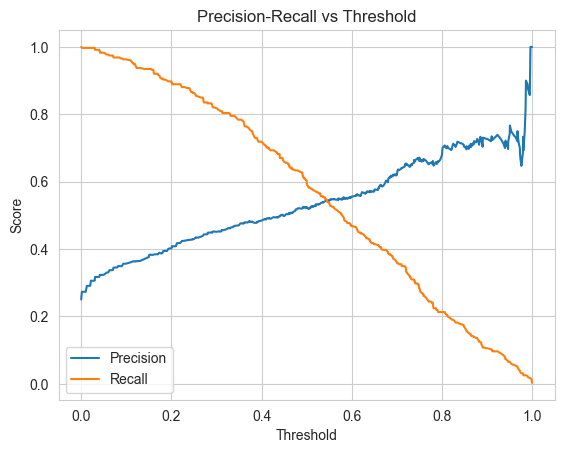

Classification Report at threshold = 0.4:

              precision    recall  f1-score   support

           0       0.89      0.74      0.81      1053
           1       0.48      0.72      0.58       352

    accuracy                           0.74      1405
   macro avg       0.69      0.73      0.69      1405
weighted avg       0.79      0.74      0.75      1405



In [36]:
from sklearn.metrics import classification_report, precision_recall_curve
import matplotlib.pyplot as plt
import numpy as np

# Step 1: churn এর probability বের করো (যেমন XGBoost বা Random Forest থেকে)
y_pred_prob = best_model.predict_proba(X_test)[:, 1]

# Step 2: Precision এবং Recall হিসাব করো বিভিন্ন threshold এ
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

# Step 3: Threshold এর সাথে Precision ও Recall এর গ্রাফ প্লট করো
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision-Recall vs Threshold')
plt.legend()
plt.show()

# Step 4: তোমার পছন্দ মতো threshold (যেমন 0.4) নির্ধারণ করো
chosen_threshold = 0.4

# Step 5: threshold ব্যবহার করে prediction তৈরি করো
y_pred_threshold = (y_pred_prob >= chosen_threshold).astype(int)

# Step 6: নতুন prediction এর classification report দেখো
print(f"Classification Report at threshold = {chosen_threshold}:\n")
print(classification_report(y_test, y_pred_threshold))


In [37]:
import joblib

# মডেল save করো (যেমন তোমার best_model)
joblib.dump(best_model, 'random_forest_model.pkl')


['random_forest_model.pkl']

In [38]:
import joblib

# মডেল লোড করো
loaded_model = joblib.load('random_forest_model.pkl')

# নতুন ডেটায় predict করো
y_pred = loaded_model.predict(X_test)


  0%|          | 0/1405 [00:00<?, ?it/s]

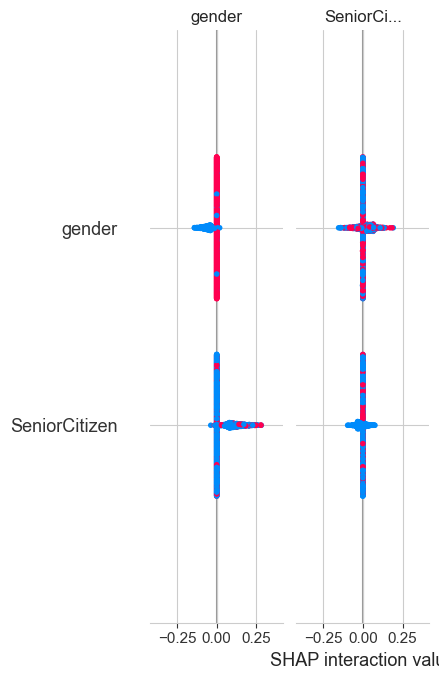

In [39]:
import shap
import numpy as np
import pandas as pd

# ১. Background data: ট্রেন ডেটা থেকে ছোট একটা স্যাম্পল নাও (শব্দ মডেলের জন্য)
background = X_train.sample(  random_state=42)

# ২. Explainer তৈরি করো
explainer = shap.KernelExplainer(best_model.predict_proba, background)

# ৩. SHAP value বের করো: টেস্ট ডেটার ছোট অংশে (যেমন প্রথম 100 সারি)
shap_values = explainer.shap_values(X_test )

# ৪. Summary plot দেখাও
shap.summary_plot(shap_values, X_test )


In [52]:
import joblib
joblib.dump(best_model, 'random_forest_model.pkl')

['random_forest_model.pkl']